# Principal Components Analysis
***

## 1 Dataset: EEG Eye State


### 1.1 Description
All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds. The eye state was detected via a camera during the EEG measurement and added later manually to the file after analysing the video frames. '1' indicates the eye-closed and '0' the eye-open state. All values are in chronological order with the first measured value at the top of the data.


### 1.2 Link 
https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State

***
## 2 Load libraries and dataset

### 2.1 Import libraries

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from scipy.io import arff
from sklearn.metrics import confusion_matrix, f1_score

%matplotlib inline

### 2.2 Load .csv file

In [110]:
# https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State
data_arff = arff.loadarff('EEG Eye State.arff')

dataset = pd.DataFrame(data_arff[0])

# Show 5 rows
dataset.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'


In [111]:
dataset.eyeDetection.unique()

array([b'0', b'1'], dtype=object)

In [112]:
# Convertendo classe para binario
dataset.loc[dataset['eyeDetection'] == b'0', 'Class'] = 0
dataset.loc[dataset['eyeDetection'] == b'1', 'Class'] = 1
dataset['eyeDetection'] = dataset['eyeDetection'].astype('int')
dataset.Class.unique()

array([ 0.,  1.])

In [113]:
X = dataset.drop(['Class'], axis=1).values
y = dataset['Class'].values

In [114]:
# Verificando quantidade de features
len(dataset.columns)

16

In [115]:
# numero de features = total de features - 1 (classe)
number_features = 15

In [116]:
pca=PCA(n_components=number_features)                                    # inicializa classe
pca.fit(X)                                # submete os dados 
PCA(copy=True, n_components=None, whiten=False)
pca.components_                              # componentes principais

array([[  5.25240792e-03,  -1.27627096e-03,  -3.54546256e-03,
          6.27521049e-01,   3.05507771e-03,   2.01115624e-01,
          5.54911491e-01,   8.72138692e-04,   1.80722083e-03,
         -1.27948558e-03,   1.40393599e-03,   1.92270620e-03,
         -3.16778450e-03,   5.07711128e-01,  -6.64854499e-07],
       [  5.10014470e-04,   4.99584957e-04,  -2.51987227e-03,
         -4.08728842e-01,   5.76585496e-04,   4.05252337e-01,
         -3.57512255e-01,   5.39756838e-04,  -5.85833607e-03,
          3.80198421e-03,  -2.29549884e-03,  -3.02593798e-03,
         -4.60949528e-03,   7.35393999e-01,  -1.81115902e-07],
       [  7.12490055e-01,   3.46356760e-03,   6.14483755e-03,
         -7.67013574e-04,   2.66534951e-03,  -6.18108715e-04,
         -8.00006405e-03,   3.36929208e-04,   6.10728558e-01,
         -7.19169415e-04,   6.15887314e-03,  -4.73144473e-03,
          3.45223281e-01,   2.57989129e-03,   1.49387473e-06],
       [ -6.23603834e-02,   5.33485757e-01,   2.72959908e-01,
     

In [117]:
pca.explained_variance_ratio_

array([  5.05244699e-01,   3.76936308e-01,   1.17729459e-01,
         4.59941146e-05,   1.92789195e-05,   1.12325971e-05,
         6.78650046e-06,   1.88972802e-06,   1.54090217e-06,
         8.24290182e-07,   7.00441776e-07,   6.27146768e-07,
         3.47734149e-07,   3.09558675e-07,   2.17645330e-09])

In [118]:
pca.explained_variance_

array([  5.24846550e+07,   3.91560211e+07,   1.22296979e+07,
         4.77785367e+03,   2.00268789e+03,   1.16683853e+03,
         7.04979461e+02,   1.96304332e+02,   1.60068417e+02,
         8.56269960e+01,   7.27616640e+01,   6.51478023e+01,
         3.61225103e+01,   3.21568545e+01,   2.26089261e-01])

In [119]:
variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
variance #cumulative sum of variance explained with [n] features

array([  50.5,   88.2,  100. ,  100. ,  100. ,  100. ,  100. ,  100. ,
        100. ,  100. ,  100. ,  100. ,  100. ,  100. ,  100. ])

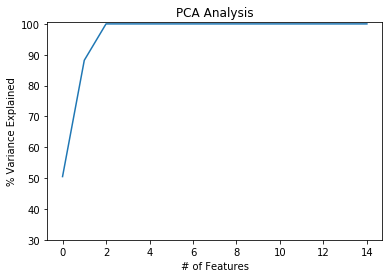

In [120]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(variance)

In [121]:
# new PCA with the best number of components (2)
# "rule of thumb"
pca = PCA(n_components=2)
pipeline = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [123]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [124]:
y_pred = pipeline.predict(X_test)

In [125]:
# Score
pipeline.score(X_test, y_test)

0.58500222518914102

In [126]:
# F-measure
f1_score(y_test, y_pred, average='micro')

0.58500222518914102

In [127]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2220,  201],
       [1664,  409]])

In [128]:
# Normalized (%)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)

Normalized confusion matrix
[[ 0.91697646  0.08302354]
 [ 0.8027014   0.1972986 ]]


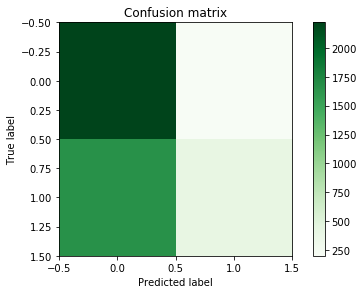

In [129]:
# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion matrix')
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')